In [1]:
from pathlib import Path
from skimage.transform import resize
import time
import h5py
import numpy as np
import torch

from astropy.table import Table

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#from data_loader import *
#from model import *
#from train import *
#from val import *

# Path and data file name
folder   = Path.cwd().parent / 'Nyx'
nbody_name  = 'N1024_L20_z2.4-nbody.h5'
#hydro_name = 'N1024_L20_z2.4-hydro.h5'

In [2]:
ske1 = np.loadtxt(folder/'spectra_Nyx_z2.4_0.0mpchspacing_1.dat')
ske2 = np.loadtxt(folder/'spectra_Nyx_z2.4_0.0mpchspacing_2.dat')

In [3]:
ske = np.append(ske1.flatten(), ske2.flatten()).reshape(1024,1024,1024)

In [4]:
np.save(folder/'spectra0_Nyx_z2.4_z.npy', ske)

In [5]:
ske = np.load(folder/'spectra0_Nyx_z2.4_z.npy')

In [6]:
ske_a = resize(ske, (169, 169, 169))
np.save(folder/'spectra_Nyx_z2.4_z.npy',ske_a)

In [5]:
ske = np.load(folder/'spectra0_Nyx_z2.4_x.npy')
DM_den = np.load(folder/'deltaDM_Nyx_L20_N160_z2.4.npy').transpose()
DM_vx = np.load(folder/'vx_DM_Nyx_L20_N160_z2.4.npy')
DM_vy = np.load(folder/'vy_DM_Nyx_L20_N160_z2.4.npy')
DM_vz = np.load(folder/'vz_DM_Nyx_L20_N160_z2.4.npy')

In [8]:
from astropy.io import fits
from pathlib import Path
from skimage.transform import resize
import time
import h5py
import numpy as np
import torch

from astropy.table import Table

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#from data_loader import *
#from model import *
#from train import *
#from val import *

# Path and data file name
folder   = Path.cwd().parent
file_name = ['tau_normed_FGPA_speed_therbr_RSD_Illustris-1_snap68_L75_N600_cic_xaxis',
            'tau_normed_FGPA_speed_therbr_RSD_Illustris-1_snap68_L75_N600_cic_yaxis',
            'tau_normed_FGPA_speed_therbr_RSD_Illustris-1_snap68_L75_N600_cic_zaxis',
            'tau_normed_FGPA_speed_therbr_RSD_Illustris-3_snap68_L75_N600_cic_xaxis',
            'tau_normed_FGPA_speed_therbr_RSD_Illustris-3_snap68_L75_N600_cic_yaxis',
            'tau_normed_FGPA_speed_therbr_RSD_Illustris-3_snap68_L75_N600_cic_zaxis',
            'tau_normed_FGPA_speed_therbr_RSD_TNG100-1_snap33_L75_N600_cic_xaxis',
            'tau_normed_FGPA_speed_therbr_RSD_TNG100-1_snap33_L75_N600_cic_yaxis',
            'tau_normed_FGPA_speed_therbr_RSD_TNG100-1_snap33_L75_N600_cic_zaxis',
            'tau_normed_FGPA_speed_therbr_RSD_TNG100-3_snap33_L75_N600_cic_xaxis',
            'tau_normed_FGPA_speed_therbr_RSD_TNG100-3_snap33_L75_N600_cic_yaxis',
            'tau_normed_FGPA_speed_therbr_RSD_TNG100-3_snap33_L75_N600_cic_zaxis']

In [2]:
f_hydro = h5py.File(folder/hydro_name, 'r')
#f_nbody = h5py.File(folder/nbody_name, 'r')

In [ ]:
ske = np.load(folder/'spectra0_Nyx_z2.4_x.npy')
ske = resize(ske, [169, 169, 169])
np.save(folder/'spectra_Nyx_z2.4_x.npy', ske)

In [ ]:
ske = np.load(folder/'spectra0_Nyx_z2.4_y.npy')
ske = resize(ske, [169, 169, 169])
np.save(folder/'spectra_Nyx_z2.4_y.npy', ske)

In [ ]:
ske = np.load(folder/'spectra0_Nyx_z2.4_z.npy')
ske = resize(ske, [169, 169, 169])
np.save(folder/'spectra_Nyx_z2.4_z.npy', ske)

In [37]:
DM_den = np.array(f['native_fields']['dark_matter_density'])
result = resize(DM_den, (250,250,250))

In [39]:
np.save('../Nyx/deltaDM_Nyx_L20_N160_z2.4', result)

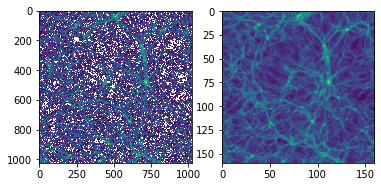

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)
ax1.imshow(DM_den[512], norm=LogNorm(vmin=0.03, vmax=1975.67))
ax2.imshow(result[80], norm=LogNorm(vmin=0.03, vmax=1975.67))

In [1]:
from pathlib import Path
from skimage.transform import resize
import time
import h5py
import numpy as np
import torch

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from skimage.transform import resize

def get_index(x, y, cofm, crange, DM_size):
    lx, ly = crange
    Nskew = len(x)
    x_range = ((x.reshape(Nskew,1)+(np.arange(lx)-(lx-1)/2))%DM_size).astype('int')
    y_range = ((y.reshape(Nskew,1)+(np.arange(ly)-(ly-1)/2))%DM_size).astype('int')

    cx = x_range.repeat(ly).reshape(Nskew,lx,ly).transpose(0,1,2)
    cy = y_range.repeat(lx).reshape(Nskew,ly,lx).transpose(0,2,1)
    
    return cx, cy#tuple([cx, cy])

# Path and data file name
folder   = Path.cwd().parent / 'Nyx'
nbody_name  = 'N1024_L20_z2.4-nbody.h5'
hydro_name = 'N1024_L20_z2.4-hydro.h5'

Ng = 1024
LBOX = 31.249999999999996
spac = LBOX / 300
nblk = 20
blk  = 0 

f = h5py.File(folder/nbody_name, 'r')

'''DM = np.array(f['native_fields']['dark_matter_density'])
f.close()

ax = np.round((np.linspace(spac/2, LBOX-spac/2, LBOX/spac) - LBOX/Ng/2) / (LBOX/Ng))
cofm = np.array(np.meshgrid(ax,ax,np.array([0.]))).T.reshape(-1,3) #all combinations of x and y
x, y = cofm[:,[0,1]].T

#for ii in range(int(300**2/300))
cx, cy = get_index(x, y, cofm, [45,45], DM.shape[0])

DM_input = np.zeros(len(cx), 11, 11, 250)
for ii in range(len(cx)):
    DM_input[ii] = resize(DM[cx[ii], cy[ii]], (11,11,250))

np.save(folder/'DM_input.npy')'''

"DM = np.array(f['native_fields']['dark_matter_density'])\nf.close()\n\nax = np.round((np.linspace(spac/2, LBOX-spac/2, LBOX/spac) - LBOX/Ng/2) / (LBOX/Ng))\ncofm = np.array(np.meshgrid(ax,ax,np.array([0.]))).T.reshape(-1,3) #all combinations of x and y\nx, y = cofm[:,[0,1]].T\n\n#for ii in range(int(300**2/300))\ncx, cy = get_index(x, y, cofm, [45,45], DM.shape[0])\n\nDM_input = np.zeros(len(cx), 11, 11, 250)\nfor ii in range(len(cx)):\n    DM_input[ii] = resize(DM[cx[ii], cy[ii]], (11,11,250))\n\nnp.save(folder/'DM_input.npy')"

In [4]:
ske1 = np.load('../Nyx/spectra1_Nyx_z2.4_z.npy')
ske2 = np.load('../Nyx/spectra2_Nyx_z2.4_z.npy')

In [13]:
ske = np.append(ske1, ske2, axis=0)

In [15]:
np.save('../Nyx/spectra_Nyx_z2.4_z', ske)

In [2]:
ske = np.load('../Nyx/spectra0_Nyx_z2.4_z.npy').reshape(1024,1024,1024)

In [8]:
ske_t0 = resize(ske, (250,250,250)) 
ske_t1 = np.exp(resize(np.log(ske), (250,250,250)))
ske_t2 = -np.log(resize(np.exp(-ske), (250,250,250)))

/home/kangyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [12]:
print(ske.mean(), ske.max(), ske.min(), ske.std())
print(ske_t0.mean(), ske_t0.max(), ske_t0.min(), ske_t0.std())
print(ske_t1.mean(), ske_t1.max(), ske_t1.min(), ske_t1.std())
print(ske_t2.mean(), ske_t2.max(), ske_t2.min(), ske_t2.std())

1867.9395084703967 338241935.13848436 0.0010203499037944224 332881.7031616626
1867.1008512407002 58254734.12363823 0.0019070680913740676 134947.33704194828
4.011800252590824 611637.4650140316 0.0018902155856410237 517.9235798649227
0.4273247876285278 22.155998671780377 0.0019070474003279828 0.8616730458303816


In [11]:
ske_t2 = -np.log(resize(np.exp(-ske), (250,250,250)))

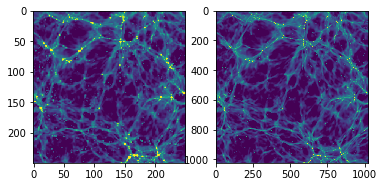

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)
ax1.imshow(ske_t0[:,:,0], norm=LogNorm(vmin=0.03, vmax=1975.67))
ax2.imshow(ske.reshape(1024,1024,1024)[:,:,[0,1,2,3]].mean(axis=-1), norm=LogNorm(vmin=0.03, vmax=1975.67))

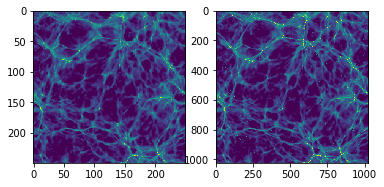

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)
ax1.imshow(ske_t1[:,:,0], norm=LogNorm(vmin=0.03, vmax=1975.67))
ax2.imshow(ske.reshape(1024,1024,1024)[:,:,[0,1,2,3]].mean(axis=-1), norm=LogNorm(vmin=0.03, vmax=1975.67))

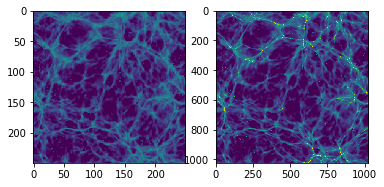

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)
ax1.imshow(ske_t2[:,:,0], norm=LogNorm(vmin=0.03, vmax=1975.67))
ax2.imshow(ske.reshape(1024,1024,1024)[:,:,[0,1,2,3]].mean(axis=-1), norm=LogNorm(vmin=0.03, vmax=1975.67))

In [1]:
from pathlib import Path
import time
import numpy as np
import torch

from data_loader import *
from model import *
from train import *
from val import *

# Path and data file name
folder  = Path.cwd().parent / 'Nyx'
DM_name = ['deltaDM_Nyx_L20_N160_z2.4.npy', 
            'vx_DM_Nyx_L20_N160_z2.4.npy',
            'vy_DM_Nyx_L20_N160_z2.4.npy',
            'vz_DM_Nyx_L20_N160_z2.4.npy']
ske_name_tra = 'spectra_Nyx_z2.4_z.npy'
ske_name_val = 'spectra_Nyx_z2.4_x.npy'



# hyper parameters
train_len  = 62500 # number of tau blocks
val_len    = 6250  # number of tau blocks
test_len   = 0  # number of skewers
train_insize = np.array([11, 11, 93]) # x, y, z respctively
train_ousize = np.array([1, 1, 25]) # x, y, z respctively
batch_size = 50
learning_rate = 0.00005
num_epochs = 20
localtime = time.localtime()
if ~(train_insize%2).all():
    raise ValueError('train size cannot be even.')

# pre-process
def pre_proc(tau, block):
    '''log(tau), 97%'''
    tau_sum = tau.sum(axis=(-1,-2,-3))
    limit = np.percentile(tau_sum, 97)
    bln = tau_sum <= limit#np.ones(len(tau), 'bool')
    tau = 2-np.exp(-tau)
    return (tau[bln],  block[bln])



# device used to train the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using device:', torch.cuda.get_device_name(device=device.index))

# load dark matter data
print('Loading dark matter...')
DM_general_tra = load_DM(folder, DM_name)
DM_general_val = load_DM(folder, DM_name)
DM_general_val = DM_general_val.transpose(0,2,3,1)[[0,2,3,1]]

# basic paramters
DM_param.pix  = len(DM_general_tra[0])
DM_param.len  = 75 # in Mpc/h
DM_param.reso = DM_param.len / DM_param.pix # in Mpc/h
# test 
if DM_general_tra.shape[1]<train_insize.min():
    raise ValueError('DarkMatter cube size',
        DM_general_tra.shape, 'is too small for train size', train_insize, '.')
DM_general_tra = torch.tensor(DM_general_tra).float()
DM_general_val = torch.tensor(DM_general_val).float()


# load skewers
print('Loading skewers...')
ske_tra, block_tra = load_skewers(folder, ske_name_tra, train_ousize, DM_param)
ske_val, block_val = load_skewers(folder, ske_name_val, train_ousize, DM_param)
# basic parameters
ske_len = int(ske_tra.shape[-1])

# divide the sample to training, validation set, and test set.
print('Setting training and validation set...')
#id_seperate = divide_data(ske_tra, train_ousize, train_len, val_len, test_len, localtime)
'''
id_seperate_tra = np.append(np.ones(train_len), np.zeros(ske_tra.shape[0]-train_len))
np.random.shuffle(id_seperate_tra)
id_seperate_val = np.append(np.ones(val_len), np.zeros(ske_val.shape[0]-val_len)) * 2
np.random.shuffle(id_seperate_val)
'''
id_seperate_tra = np.load('id_seperate/id_seperate_tra_2020-05-06_18:06:22.npy')
id_seperate_val = np.load('id_seperate/id_seperate_val_2020-05-06_18:06:22.npy')

Using device: Quadro P6000
Loading dark matter...
Loading skewers...
Setting training and validation set...


In [2]:
train_ske, train_block = load_train(ske_tra, block_tra, id_seperate_tra,
                                    train_ousize, batch_size, pre_proc)

In [6]:
id_seperate_val.sum()

62500.0

In [3]:
val_ske, val_block = load_val(ske_val, block_val, id_seperate_val,
                              train_ousize, batch_size, pre_proc)

IndexError: cannot do a non-empty take from an empty axes.